<center><img src="img/tempmap1.png"/></center>

<h1><center>Exploring Weather Trends</center></h1>
<h3><center>Jeffrey Smith</center></h3>
<h5><center>04/23/2020</center></h5>

## Project Overview

The goal of this project is to analyze local and global temperature data and compare the temperature trends from my local area to the overall global temperature trends. This analysis will first identify specific project objectives and discuss the various tools used throughout. Next, the analysis will explore the various data sets made available for this project. It will then provide an annual moving average analysis of temperatures both local to my area, and globally. Lastly, this project will conclude with a discussion of observations that are highlighted between the localized and global analysis.

## Project Objectives

- Export temperature data from Udacity's database
- Create visualizations comparing local and global temperatures
- Make observations of similarities and differences in local and global temperature averages



## Tools Used:

- **Python 3.7.4 64-bit**: Calculations and visualizations
- **SQL**: Data extraction


## Data Acquisition

The data provided for this project is provided by Udacity through a SQL Workspace. This analysis was provided three tables from the temperatures database. The database schema is as follows:

- **city_list** - This contains a list of cities and countries in the database. Look through them in order to find the city nearest to you.
- **city_data** - This contains the average temperatures for each city by year (C).
- **global_data** - This contains the average global temperatures by year (C). 

Using the temperatures database and the three tables provided, we executed the following queries to obtain the data required for this project.

### Global Data Query
```sql
SELECT *
FROM global_data
```
### City Data Query
```sql
SELECT *
FROM city_data
WHERE country = 'United States' AND city= 'Columbus';
```

The results of both queries have been saved as comma-separated-value (csv) files in the accompanying **data** folder.




## Data Exploration

Let's begin by ingesting both the global and local data sets. This exploration will focus on the global data before moving into an analysis of the local data.. 


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

global_data = pd.read_csv("data/global_data.csv")
local_data = pd.read_csv("data/city_data.csv", usecols=['year','avg_temp'])
#edit column names
global_data.columns = ["year","GAT"]
local_data.columns =["year","LAT"]
#examine the first five rows of the global data
print("First Five Rows:\n",global_data.head(),"\n")
print("Global Data Information:\n",global_data.info(),"\n")
print("Global Data Description:\n",global_data.describe(),"\n")


First Five Rows:
    year   GAT
0  1750  8.72
1  1751  7.98
2  1752  5.78
3  1753  8.39
4  1754  8.47 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    266 non-null    int64  
 1   GAT     266 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.3 KB
Global Data Information:
 None 

Global Data Description:
               year         GAT
count   266.000000  266.000000
mean   1882.500000    8.369474
std      76.931788    0.584747
min    1750.000000    5.780000
25%    1816.250000    8.082500
50%    1882.500000    8.375000
75%    1948.750000    8.707500
max    2015.000000    9.830000 



Examining the global data set, we find that there are 266 temperatures listed from the 1750 to 2015. Additionally, there are no missing values. 

Let's examine the local dataset. 

In [3]:
#examine the first five rows of the local data
print("First Five Rows:\n",local_data.head(),"\n")
print("City Data Information:\n",local_data.info(),"\n")
print("City Data Description:\n",local_data.describe(),"\n")

First Five Rows:
    year    LAT
0  1743   7.46
1  1744  15.73
2  1745   6.91
3  1746    NaN
4  1747    NaN 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    271 non-null    int64  
 1   LAT     266 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.4 KB
City Data Information:
 None 

City Data Description:
               year         LAT
count   271.000000  266.000000
mean   1878.000000   13.941090
std      78.375166    1.107914
min    1743.000000    6.060000
25%    1810.500000   13.582500
50%    1878.000000   14.070000
75%    1945.500000   14.450000
max    2013.000000   16.050000 



Examining the local data, we find that there are 271 entries of which 266 are non-null. We also note that the data set spans the years of 1743 to 2013 which differs from the global data set. We will remove the null values from this data.

In [4]:
local_data.dropna(inplace=True)

## Moving Averages Analysis

Moving average is a trend-following technical analysis method based on past data. This method of averaging helps to smooth out data. For this analysis we will implement a 10-year moving average on both the global and local data. To implement this average, we will create a new column in both datasets for the moving average and implementing pandas `rolling` method and adding the results as a new column to both datasets.




In [8]:
# create Global Moving Average
GMA = global_data.GAT.rolling(window=10).mean()
# add column to dataset
global_data['GMA'] = GMA
# create Local Moving Averge
LMA = local_data.LAT.rolling(window=10).mean()
# add column to dataset
local_data['LMA'] = LMA

global_data.head(12)

,year,GAT,GMA
0,1750,8.72,NaN
1,1751,7.98,NaN
2,1752,5.78,NaN
3,1753,8.39,NaN
4,1754,8.47,NaN
5,1755,8.36,NaN
6,1756,8.85,NaN
7,1757,9.02,NaN
8,1758,6.74,NaN
9,1759,7.99,8.030


## Data Visualization

Let's now plot the moving averages of both the global and local data in a single plot.

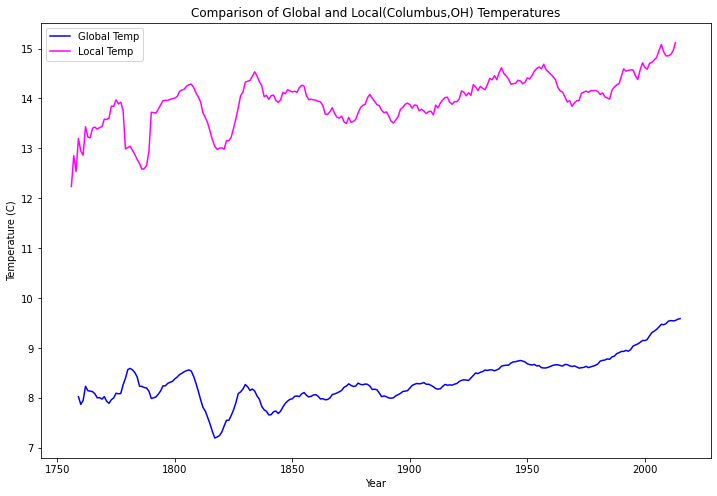

In [6]:
plt.figure(figsize=[12,8])
plt.plot(global_data.year, global_data.GMA, label="Global Temp", color='blue')
plt.plot(local_data.year, local_data.LMA, label="Local Temp",color='magenta')
plt.legend(loc='upper left')
plt.title('Comparison of Global and Local(Columbus,OH) Temperatures', fontsize=12)
plt.xlabel("Year")
plt.ylabel("Temperature (C)")
plt.show()

## Conclusion

Analyzing the moving average plot we find that the temperatures in Columbus, OH are significantly warmer than the global temperature average. Additionally, we find a gradual increase in temperatures across both the global and local data from around 1820 and continuing into today.
